In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
df_inf=pd.read_csv("C:/Users/91700/Dropbox/My PC (LAPTOP-PNE96T6T)/Documents/PCOS_infertility.csv",encoding='iso-8859-1')
df_noinf=pd.read_csv("C:/Users/91700/Dropbox/My PC (LAPTOP-PNE96T6T)/Documents/PCOS_data_without_infertility.csv",encoding='iso-8859-1')
print(f"Shape of df_inf:{df_inf.shape}")
print(f"Shape of df_noinf:{df_noinf.shape}")

Shape of df_inf:(541, 6)
Shape of df_noinf:(541, 45)


In [69]:
y=df_noinf['PCOS (Y/N)']
X=df_noinf.drop(['PCOS (Y/N)'], axis=1)

In [70]:
corr_features=df_noinf.corrwith(df_noinf["PCOS (Y/N)"]).abs().sort_values(ascending=False)
#features with correlation more than 0.4
corr_features=corr_features[corr_features>0.4].index
corr_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

In [71]:
df_inf.corrwith(df_inf["PCOS (Y/N)"]).abs()

Sl. No                    0.060998
Patient File No.          0.060998
PCOS (Y/N)                1.000000
  I   beta-HCG(mIU/mL)    0.027617
II    beta-HCG(mIU/mL)    0.012757
dtype: float64

In [72]:
y=df_noinf['PCOS (Y/N)']
X=df_noinf.drop(['PCOS (Y/N)'], axis=1)

In [73]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=100, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from nltk.classify.scikitlearn import SklearnClassifier



# logistic regression
model1 = RandomForestClassifier(n_estimators=50,random_state=40)
model2 = KNeighborsClassifier()
model3 = LogisticRegression()
model4 = DecisionTreeClassifier()
model5 = SVC(kernel='linear',probability=True)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)

In [75]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,-1:], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,-1:], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,-1:], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,-1:], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,-1:], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [76]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,-1:])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,-1:])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,-1:])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,-1:])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,-1:])

print(auc_score1,auc_score2,auc_score3,auc_score4,auc_score5)

0.945054945054945 0.9560439560439561 0.9340659340659341 0.8186813186813187 0.8901098901098902


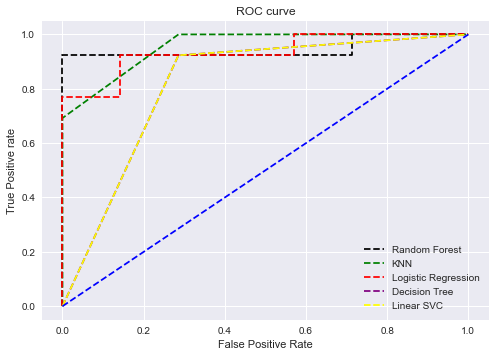

In [77]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Decision Tree')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='Linear SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.show();
